# Day 24: April 24th 2020

## LRU Cache

### Problem Statement:

Design and implement a data structure for Least Recently Used (LRU) cache. It should support the following operations: get and put.

get(key) - Get the value (will always be positive) of the key if the key exists in the cache, otherwise return -1.

put(key, value) - Set or insert the value if the key is not already present. When the cache reached its capacity, it should invalidate the least recently used item before inserting a new item.

The cache is initialized with a positive capacity.

### Code:

In [1]:
from collections import OrderedDict
class LRUCache:
    def __init__(self, capacity: int):
        self.cap = capacity
        self.od = OrderedDict()

    def get(self, key: int) -> int:
        if key in self.od:
            self.od.move_to_end(key)
            return self.od.get(key)
        else:
            return -1
        
    def put(self, key: int, value: int) -> None:
        if key in self.od:
            self.od.pop(key)
            self.od[key] = value
        else:
            if len(self.od) >= self.cap:
                self.od.popitem(last=False)
            self.od[key] = value

### Testing:

#### Example 1:

In [2]:
cache = LRUCache(2)
result = []
result.append(cache.put(1,8))
result.append(cache.put(2,6))
result.append(cache.get(1))
result.append(cache.put(3,5))
result.append(cache.get(2))
result.append(cache.put(4,9))
result.append(cache.get(1))
result.append(cache.get(3))
result.append(cache.get(4))
result

[None, None, 8, None, -1, None, -1, 5, 9]

Explanation:

cache = LRUCache(2); // capacity = 2

cache.put(1, 8);     // adds key 1 and value 8 to the end of theordered dictionary. returns None

cache.put(2, 6);     // adds key 2 and value 6 to the end of the ordered dictionary. returns None

cache.get(1);        // moves key 1 and value 8 to the end of the ordered dictionary. returns value 8

cache.put(3, 5);     // evicts key 2. adds key 3 and value 5 to the end of the ordered dictionary. returns None

cache.get(2);        // returns -1 (key not found)

cache.put(4, 9);     // evicts key 1. adds key 4 and value 9 to the end of the ordered dictionary. returns None

cache.get(1);        // returns -1 (key not found)

cache.get(3);        // moves key 3 and value 5 to the end of the ordered dictionary. returns value 5

cache.get(4);        // moves key 4 and value 9 to the end of the ordered dictionary. returns value 9

#### Example 2:

In [3]:
cache = LRUCache(3)
result = []
result.append(cache.put(1,8))
result.append(cache.put(2,1))
result.append(cache.put(1,7))
result.append(cache.get(1))
result.append(cache.get(2))
result.append(cache.put(5,4))
result.append(cache.get(4))
result.append(cache.get(5))
result.append(cache.put(4,7))
result.append(cache.get(1))
result.append(cache.get(4))
result

[None, None, None, 7, 1, None, -1, 4, None, -1, 7]

Explanation:

cache = LRUCache(2); // capacity = 3

cache.put(1, 8);     // adds key 1 and value 8 to the end of the ordered dictionary. returns None

cache.put(2, 1);     // adds key 2 and value 1 to the end of the ordered dictionary. returns None

cache.put(1, 7);     // updates the value of key 1 from 8 to 7 and moves it to the end of the ordered dictionary. returns None

cache.get(1);        // moves key 1 and value 7 to the end of the ordered dictionary. returns value 7

cache.get(2);        // moves key 2 and value 1 to the end of the ordered dictionary. returns value 1

cache.put(5, 4);     // adds key 5 and value 4 to the end of ordered dictionary. returns None

cache.get(4);        // returns -1 (key not found)

cache.get(5);        // moves key 5 and value 4 to the end of the ordered dictionary. returns value 4

cache.put(4, 7);     // evicts key 1. adds key 4 and value 7 to the end of the ordered dictionary. returns None

cache.get(1);        // returns -1 (key not found)

cache.get(4);        // moves key 4 and value 7 to the end of the ordered dictionary. returns value 7

### Evaluation:

The runtime complexity of both operations (get and put) is O(1). Below you can see the submission details for my code.

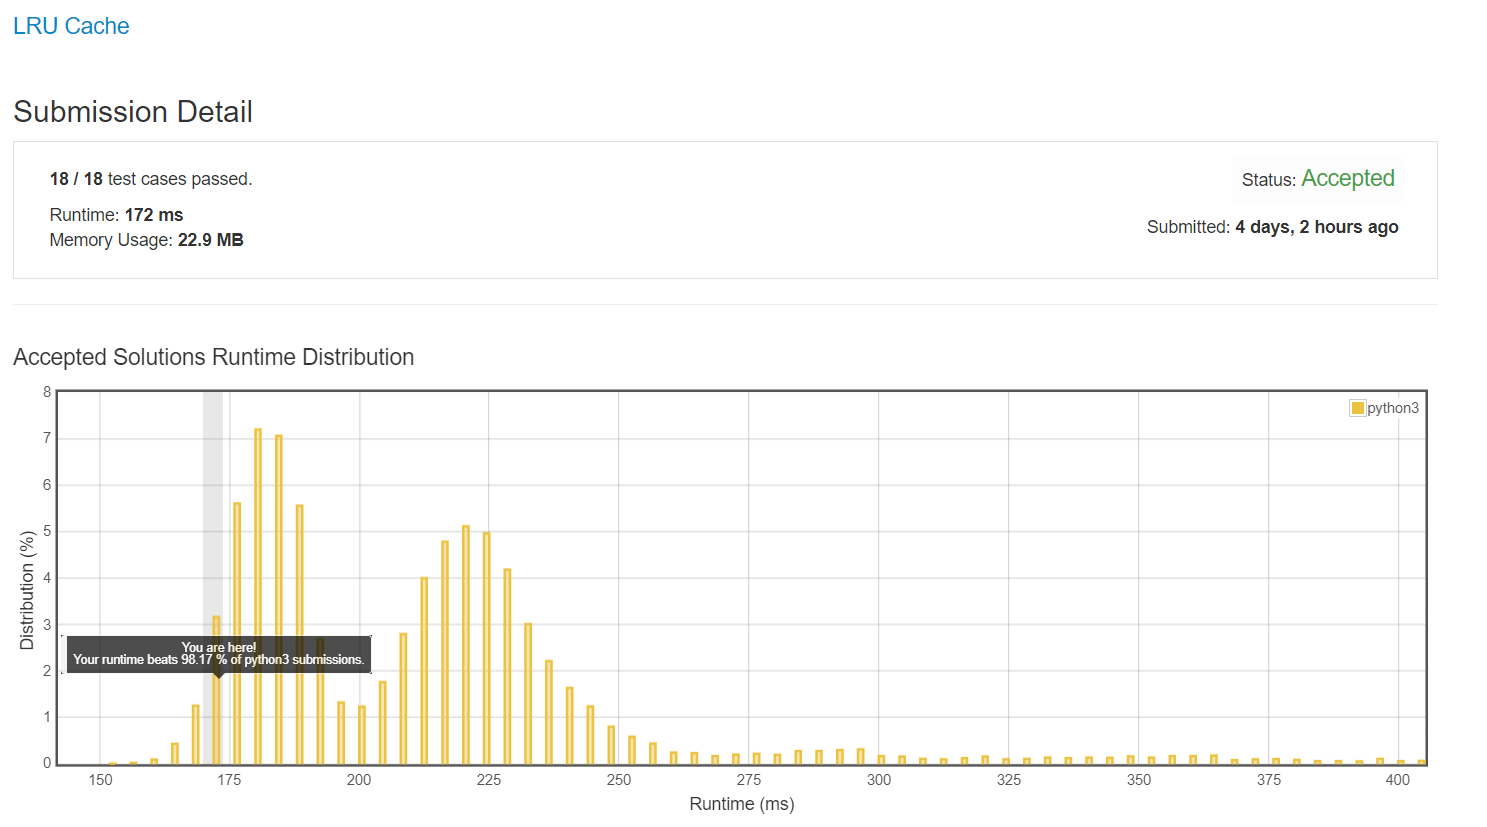

In [4]:
from IPython.display import Image
Image("lru-cache.png")